In [38]:
import pyodbc as db
import pandas as pd
con = db.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=DESKTOP-17SR5M8\SQLEXPRESS;Trusted_Connection=yes;DATABASE=AdventureWorksDW2017')
df = pd.read_sql_query('''select C.table_name,
c.column_name
from INFORMATION_SCHEMA.COLUMNS C
inner join
( select column_name
from INFORMATION_SCHEMA.COLUMNS
GROUP BY COLUMN_NAME
HAVING COUNT(*)>1) dupes
ON dupes.COLUMN_NAME=C.COLUMN_NAME
''', con)

df["table_name"].value_counts()

vTargetMail                                      31
DimCustomer                                      29
FactResellerSales                                27
FactInternetSales                                26
ProspectiveBuyer                                 18
DimEmployee                                      15
vDMPrep                                          13
FactSurveyResponse                                7
FactFinance                                       7
DimProduct                                        6
DimReseller                                       6
DimGeography                                      5
FactCurrencyRate                                  5
FactSalesQuota                                    5
DimDate                                           4
vTimeSeries                                       4
NewFactCurrencyRate                               4
vAssocSeqOrders                                   4
FactInternetSalesReason                           3
vAssocSeqLin

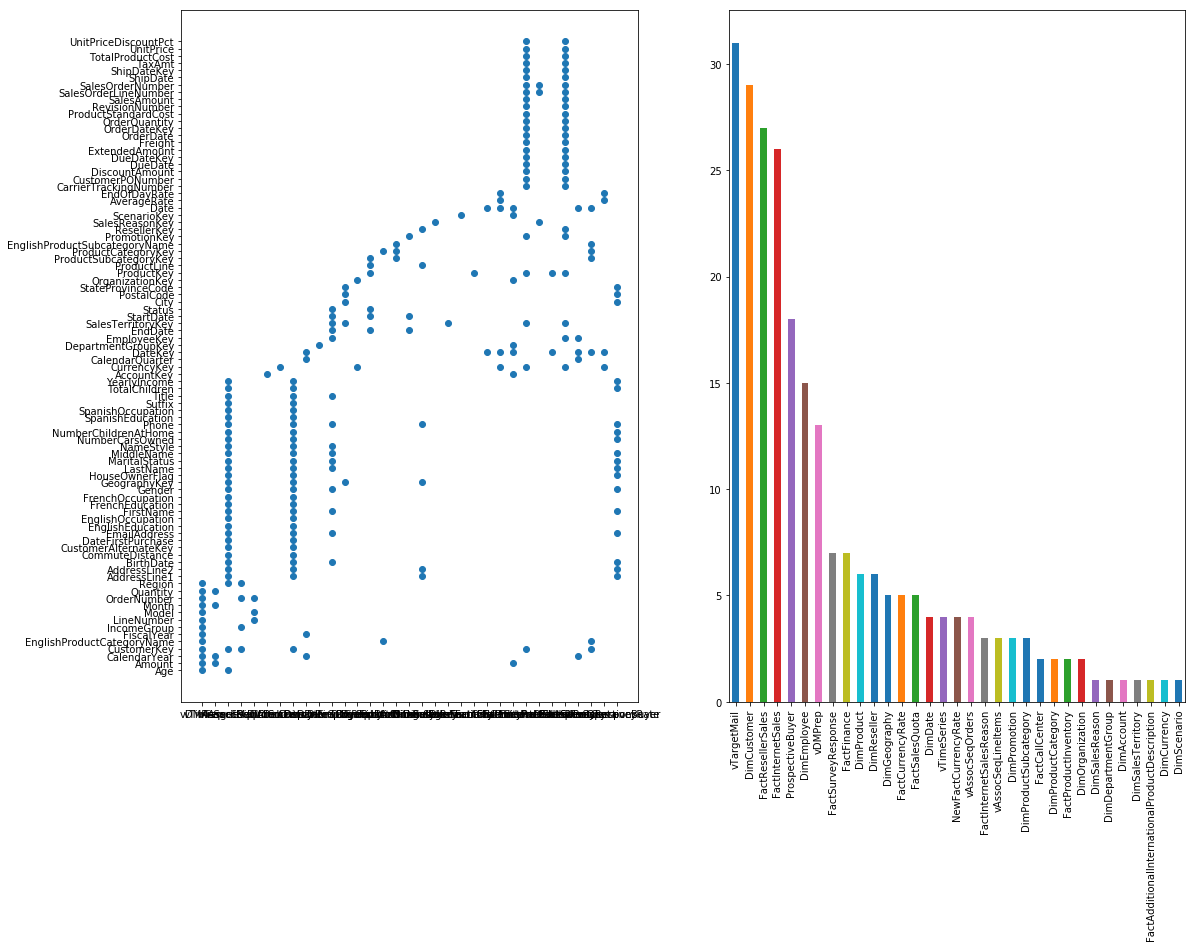

In [96]:
from matplotlib import pyplot as plt
fg = plt.figure(figsize=(18,28))
ax1=fg.add_subplot(2,2,1)
ax1.scatter(df.table_name,df.column_name)
ax2=fg.add_subplot(2,2,2)
#ax2.plot(df.table_name,df.column_name)
df["table_name"].value_counts().plot(kind='bar',ax=ax2)
plt.show()